In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path = "/content/gdrive/MyDrive/praktikum/praktikum4/data/calonpembelimobil.csv"

In [ ]:
df = pd.read_csv(path)
df

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1
...,...,...,...,...,...,...,...
995,996,51,0,1,2,293,1
996,997,61,1,0,2,275,1
997,998,45,1,0,0,406,1
998,999,48,0,1,2,432,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [ ]:
df.isnull().sum()

,0
ID,0
Usia,0
Status,0
Kelamin,0
Memiliki_Mobil,0
Penghasilan,0
Beli_Mobil,0


In [ ]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
ID,1.000000,0.149779,-0.006634,0.014646,0.068555,0.254177,0.168614
Usia,0.149779,1.000000,0.051476,0.019454,0.090926,0.125859,0.100127
Status,-0.006634,0.051476,1.000000,-0.008561,0.048302,0.071714,0.048584
Kelamin,0.014646,0.019454,-0.008561,1.000000,0.035199,-0.054211,-0.147301
Memiliki_Mobil,0.068555,0.090926,0.048302,0.035199,1.000000,0.137823,0.102005
Penghasilan,0.254177,0.125859,0.071714,-0.054211,0.137823,1.000000,0.763930
Beli_Mobil,0.168614,0.100127,0.048584,-0.147301,0.102005,0.763930,1.000000


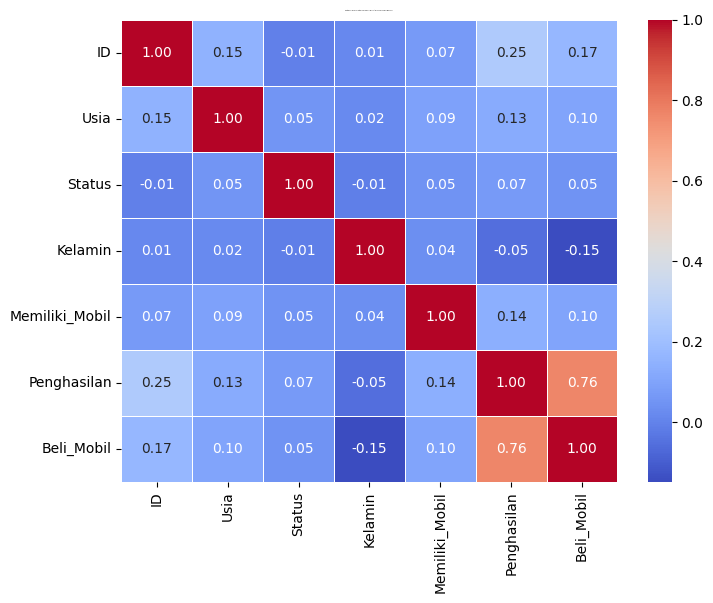

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi antar variabel numerik terhadap Pembelian Mobil", fontsize=1)
plt.show()

In [ ]:
feature_num = ['Penghasilan']
feature_bin = ['Kelamin']


use_cols = feature_num + feature_bin + ['Beli_Mobil']
df_model = df[use_cols].dropna().copy()

X = df_model[feature_num + feature_bin]
y = df_model['Beli_Mobil']

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1000, 2)
y shape: (1000,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Data latih:", X_train.shape)
print("Data uji:", y_train.shape)

Data latih: (800, 2)
Data uji: (800,)


In [ ]:
praprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), feature_num),
        ('bin', 'passthrough', feature_bin)
    ],
    remainder='drop'
)

model = LogisticRegression(
    max_iter = 1000,
    solver = 'lbfgs',
    class_weight = 'balanced',
    random_state=42
)

clf = Pipeline([
    ('praprocess', praprocess),
    ('model', model)
])

clf.fit(X_train, y_train)
print("model logistik berhasil dilatih")

model logistik berhasil dilatih


In [ ]:
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, roc_auc_score

print(f"Akurasi        : {accuracy_score(y_test, y_pred):.4f}")
print(f"Presisi        : {precision_score(y_test, y_pred, zero_division=0):4f}")
print(f"Recall         : {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1 Score       : {f1_score(y_test, y_pred, zero_division=0):.4f}")
print(f"ROC AUC Score  : {roc_auc_score(y_test, y_prob):.4f}")

Akurasi        : 0.9300
Presisi        : 0.982906
Recall         : 0.9055
F1 Score       : 0.9426
ROC AUC Score  : 0.9767


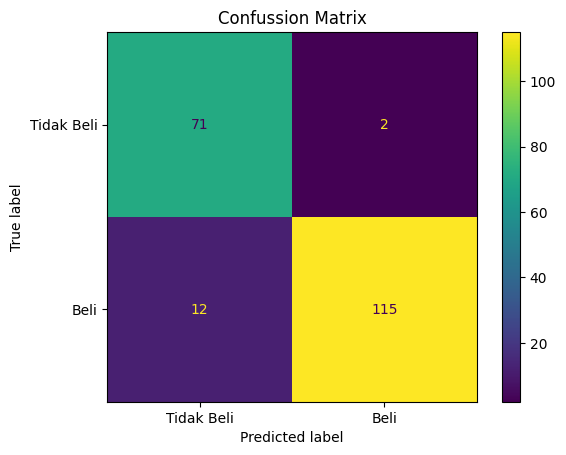

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


<Figure size 600x600 with 0 Axes>

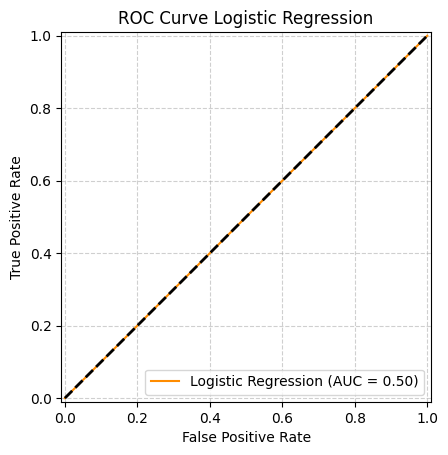

In [35]:
ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred),
    display_labels=['Tidak Beli', 'Beli']
).plot(values_format='d')

plt.title("Confussion Matrix")
plt.show()

plt.figure(figsize=(6,6))
RocCurveDisplay.from_estimator(model, X_test, y_test, name="Logistic Regression", color='darkorange')
plt.plot([0,1], [0,1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['Tidak Beli (0)', 'Beli (1)']))

                precision    recall  f1-score   support

Tidak Beli (0)       0.86      0.97      0.91        73
      Beli (1)       0.98      0.91      0.94       127

      accuracy                           0.93       200
     macro avg       0.92      0.94      0.93       200
  weighted avg       0.94      0.93      0.93       200



In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=5)

print("Skor tiap fold", scores)
print("Rata-rata akurasi", np.mean(scores))
print("Skor tiap fold", np.std(scores))

Skor tiap fold [0.8   0.92  0.96  0.955 0.94 ]
Rata-rata akurasi 0.915
Skor tiap fold 0.059160797830996134


In [ ]:
feat_names = feature_num + feature_bin
coefs = clf.named_steps['model'].coef_[0]
odds = np.exp(coefs)

coef_df = pd.DataFrame({
    'Fitur': feat_names,
    'Koefisien (log-odds)': coefs,
    'Odds Ratio (e^coef)': odds
}).sort_values('Odds Ratio (e^coef)', ascending=False)

display(coef_df)

,Fitur,Koefisien (log-odds),Odds Ratio (e^coef)
0,Penghasilan,4.517868,91.640008
1,Kelamin,-1.142607,0.318986


In [ ]:
data_baru = pd.DataFrame({
    'Penghasilan': [240,100],
    'Kelamin': [1, 0],
})

pred = clf.predict(data_baru)
prob = clf.predict_proba(data_baru)[:, 1]

hasil = data_baru.copy()
hasil['Prob_beli'] = pred
hasil['Prob (0=Tidak, 1=Ya)'] = prob
display(hasil)

,Penghasilan,Kelamin,Prob_beli,"Prob (0=Tidak, 1=Ya)"
0,240,1,0,0.455146
1,100,0,0,0.003274
